In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings 

warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("/Users/aytackolukisa/Desktop/Jupiter_Dosyaları/states_all_extended.csv")

In [3]:
df1 = data.drop(["PRIMARY_KEY","STATE"],axis=1)

In [4]:
def ortalama (variable):
    a=df1.groupby('YEAR')[variable].mean()
    liste=np.arange(len(a))
    for i in liste :
        df1[variable].fillna(a.values[i], inplace = True)

In [5]:
liste =df1.columns

In [6]:
for x in liste:
    ortalama(x)

In [7]:
df1.isnull().sum()*100/len(df1)

YEAR                    0.0
ENROLL                  0.0
TOTAL_REVENUE           0.0
FEDERAL_REVENUE         0.0
STATE_REVENUE           0.0
                       ... 
G08_AM_A_MATHEMATICS    0.0
G08_HP_A_READING        0.0
G08_HP_A_MATHEMATICS    0.0
G08_TR_A_READING        0.0
G08_TR_A_MATHEMATICS    0.0
Length: 264, dtype: float64

In [8]:
for c in liste:
    data[c]=df1[c]

In [9]:
data.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,G08_HI_A_READING,G08_HI_A_MATHEMATICS,G08_AS_A_READING,G08_AS_A_MATHEMATICS,G08_AM_A_READING,G08_AM_A_MATHEMATICS,G08_HP_A_READING,G08_HP_A_MATHEMATICS,G08_TR_A_READING,G08_TR_A_MATHEMATICS
0,1992_ALABAMA,ALABAMA,1992,802054.333333,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,253.708333,269.897959,276.354839,304.032258,248.307692,260.461538,249.0,266.0,268.5,286.3
1,1992_ALASKA,ALASKA,1992,802054.333333,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,253.708333,269.897959,276.354839,304.032258,248.307692,260.461538,249.0,266.0,268.5,286.3
2,1992_ARIZONA,ARIZONA,1992,802054.333333,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,253.708333,269.897959,276.354839,304.032258,248.307692,260.461538,249.0,266.0,268.5,286.3
3,1992_ARKANSAS,ARKANSAS,1992,802054.333333,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,253.708333,269.897959,276.354839,304.032258,248.307692,260.461538,249.0,266.0,268.5,286.3
4,1992_CALIFORNIA,CALIFORNIA,1992,802054.333333,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,253.708333,269.897959,276.354839,304.032258,248.307692,260.461538,249.0,266.0,268.5,286.3


## AYKIRI DEĞER TESPİTİ

### Görsel Tespit

TOTAL_REVENUE ve TOTAL_EXPENDITURE değişkenlerindeki aykırılıkları görsel açıdan tespitini yapalım. Bunun için
matplotlib kütüphanesinden boxplot görselleştirme aracını kullanacağız.

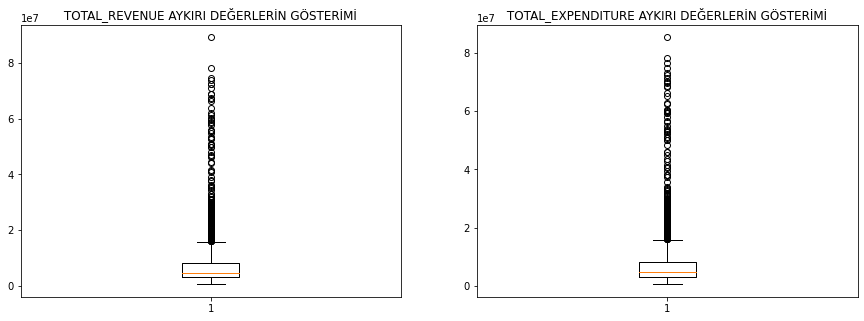

In [10]:
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }


plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.boxplot(data.TOTAL_REVENUE)
plt.title(" TOTAL_REVENUE AYKIRI DEĞERLERİN GÖSTERİMİ ")

plt.subplot(1,2,2)
plt.boxplot(data.TOTAL_EXPENDITURE)
plt.title(" TOTAL_EXPENDITURE AYKIRI DEĞERLERİN GÖSTERİMİ ")

plt.show()

Görsel açıdan bakıldığında TOTAL_REVENUE ve TOTAL_EXPENDITURE değişkenlerinde çok sayıda aşırı değer bulunmaktadır. Şimdi bu değişkenleri matematiksel yönden adet ve sayı olarak inceleyelim 

## Z SCORE

In [11]:
from scipy.stats import zscore

In [12]:
zscore_TOTAL_REVENUE, zscore_TOTAL_EXPENDITURE = zscore(data.TOTAL_REVENUE),zscore(data.TOTAL_EXPENDITURE)

In [13]:
for i in range(1,5):
    print("{} TOTAL_REVENUE için Eşik sayısı".format(i))
    print("{} TOTAL_REVENUE kapsamında eşiği geçen değer sayısı". format(len(np.where(zscore_TOTAL_REVENUE>i)[0])))
    print("-----")

1 TOTAL_REVENUE için Eşik sayısı
165 TOTAL_REVENUE kapsamında eşiği geçen değer sayısı
-----
2 TOTAL_REVENUE için Eşik sayısı
70 TOTAL_REVENUE kapsamında eşiği geçen değer sayısı
-----
3 TOTAL_REVENUE için Eşik sayısı
43 TOTAL_REVENUE kapsamında eşiği geçen değer sayısı
-----
4 TOTAL_REVENUE için Eşik sayısı
33 TOTAL_REVENUE kapsamında eşiği geçen değer sayısı
-----


In [14]:
for i in range(1,5):
    print("{} TOTAL_EXPENDITURE için Eşik sayısı".format(i))
    print("{} TOTAL_EXPENDITURE kapsamında eşiği geçen değer sayısı". format(len(np.where(zscore_TOTAL_EXPENDITURE>i)[0])))
    print("-----")

1 TOTAL_EXPENDITURE için Eşik sayısı
161 TOTAL_EXPENDITURE kapsamında eşiği geçen değer sayısı
-----
2 TOTAL_EXPENDITURE için Eşik sayısı
67 TOTAL_EXPENDITURE kapsamında eşiği geçen değer sayısı
-----
3 TOTAL_EXPENDITURE için Eşik sayısı
44 TOTAL_EXPENDITURE kapsamında eşiği geçen değer sayısı
-----
4 TOTAL_EXPENDITURE için Eşik sayısı
35 TOTAL_EXPENDITURE kapsamında eşiği geçen değer sayısı
-----


## TUKEY YÖNTEMİ

In [15]:
eksik_degerler_TOTAL_EXPENDITURE = pd.DataFrame( columns = ["esik_degeri_TOTAL_EXPENDITURE", "asigi_deger_sayısı_TOTAL_EXPENDITURE"] )
Q1,Q3 = np.percentile(data.TOTAL_EXPENDITURE,[25,75])
step=Q3-Q1
for i in np.arange(0,5,0.5):
    max_sinir = Q3+step*i
    min_sinir = Q1-step*i
    asigi_deger_sayısı_TOTAL_EXPENDITURE = len(np.where((data.TOTAL_EXPENDITURE > max_sinir ) | (data.TOTAL_EXPENDITURE < min_sinir ))[0])
    eksik_degerler_TOTAL_EXPENDITURE = eksik_degerler_TOTAL_EXPENDITURE.append({ "esik_degeri_TOTAL_EXPENDITURE" : i, "asigi_deger_sayısı_TOTAL_EXPENDITURE" : asigi_deger_sayısı_TOTAL_EXPENDITURE}, ignore_index=True)
    
eksik_degerler_TOTAL_EXPENDITURE    

,esik_degeri_TOTAL_EXPENDITURE,asigi_deger_sayısı_TOTAL_EXPENDITURE
0,0.0,858.0
1,0.5,315.0
2,1.0,246.0
3,1.5,195.0
4,2.0,160.0
5,2.5,134.0
6,3.0,109.0
7,3.5,95.0
8,4.0,67.0
9,4.5,56.0


In [16]:
eksik_degerler_TOTAL_REVENUE = pd.DataFrame(columns = ["esik_degeri_TOTAL_REVENUE","asigi_deger_sayısı_TOTAL_REVENUE"])
Q3,Q1 = np.percentile(data.TOTAL_REVENUE, [75,25])
step = Q3-Q1
for i in np.arange(0,5,0.5):
    max_sinir = Q3+step*i
    min_sinir = Q1-step*i
    asiri_deger_TOTAL_REVENUE = len(np.where((data.TOTAL_REVENUE > max_sinir) | (data.TOTAL_REVENUE < min_sinir))[0])
    eksik_degerler_TOTAL_REVENUE = eksik_degerler_TOTAL_REVENUE.append( {"esik_degeri_TOTAL_REVENUE" : i, "asigi_deger_sayısı_TOTAL_REVENUE" : asiri_deger_TOTAL_REVENUE},ignore_index=True)

eksik_degerler_TOTAL_REVENUE

,esik_degeri_TOTAL_REVENUE,asigi_deger_sayısı_TOTAL_REVENUE
0,0.0,858.0
1,0.5,321.0
2,1.0,246.0
3,1.5,195.0
4,2.0,161.0
5,2.5,132.0
6,3.0,111.0
7,3.5,90.0
8,4.0,70.0
9,4.5,54.0


## AYKIRI DEĞERLERİN SINIRLANDIRILMASI

### WINSORİZATION

In [17]:
from scipy.stats.mstats import winsorize

winsorize_TOTAL_REVENUE = winsorize(data.TOTAL_REVENUE, (0,0.115))
winsorize_TOTAL_EXPENDITURE = winsorize(data.TOTAL_REVENUE, (0,0.115))

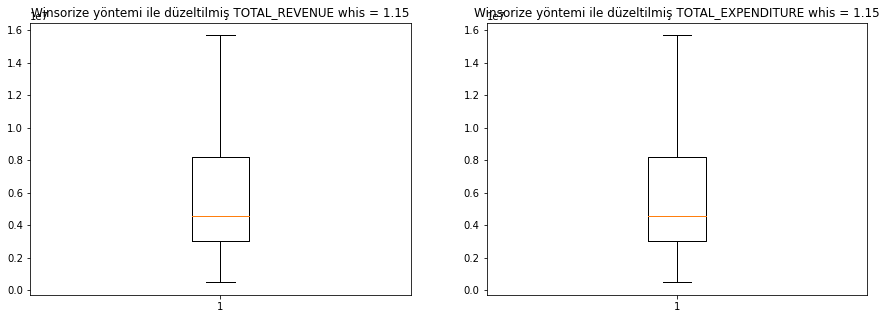

In [18]:
plt.figure(figsize =(15,5))
plt.subplot(1,2,1)
plt.boxplot(winsorize_TOTAL_REVENUE)
plt.title("Winsorize yöntemi ile düzeltilmiş TOTAL_REVENUE whis = 1.15")

plt.subplot(1,2,2)
plt.boxplot(winsorize_TOTAL_EXPENDITURE)
plt.title("Winsorize yöntemi ile düzeltilmiş TOTAL_EXPENDITURE whis = 1.15")
plt.show()

## AYKIRI DEĞERLERİ DÖNÜŞTÜRME

In [19]:
len(winsorize_TOTAL_REVENUE)

1715

In [20]:
len(data.TOTAL_REVENUE)

1715

In [21]:
data.TOTAL_REVENUE=winsorize_TOTAL_REVENUE

In [22]:
eksik_degerler_TOTAL_REVENUE = pd.DataFrame(columns = ["esik_degeri_TOTAL_REVENUE","asigi_deger_sayısı_TOTAL_REVENUE"])
Q3,Q1 = np.percentile(data.TOTAL_REVENUE, [75,25])
step = Q3-Q1
for i in np.arange(0,5,0.5):
    max_sinir = Q3+step*i
    min_sinir = Q1-step*i
    asiri_deger_TOTAL_REVENUE = len(np.where((data.TOTAL_REVENUE > max_sinir) | (data.TOTAL_REVENUE < min_sinir))[0])
    eksik_degerler_TOTAL_REVENUE = eksik_degerler_TOTAL_REVENUE.append( {"esik_degeri_TOTAL_REVENUE" : i, "asigi_deger_sayısı_TOTAL_REVENUE" : asiri_deger_TOTAL_REVENUE},ignore_index=True)

eksik_degerler_TOTAL_REVENUE

,esik_degeri_TOTAL_REVENUE,asigi_deger_sayısı_TOTAL_REVENUE
0,0.0,858.0
1,0.5,321.0
2,1.0,246.0
3,1.5,0.0
4,2.0,0.0
5,2.5,0.0
6,3.0,0.0
7,3.5,0.0
8,4.0,0.0
9,4.5,0.0


In [23]:
data.TOTAL_EXPENDITURE=winsorize_TOTAL_EXPENDITURE

In [24]:
eksik_degerler_TOTAL_EXPENDITURE = pd.DataFrame( columns = ["esik_degeri_TOTAL_EXPENDITURE", "asigi_deger_sayısı_TOTAL_EXPENDITURE"] )
Q1,Q3 = np.percentile(data.TOTAL_EXPENDITURE,[25,75])
step=Q3-Q1
for i in np.arange(0,5,0.5):
    max_sinir = Q3+step*i
    min_sinir = Q1-step*i
    asigi_deger_sayısı_TOTAL_EXPENDITURE = len(np.where((data.TOTAL_EXPENDITURE > max_sinir ) | (data.TOTAL_EXPENDITURE < min_sinir ))[0])
    eksik_degerler_TOTAL_EXPENDITURE = eksik_degerler_TOTAL_EXPENDITURE.append({ "esik_degeri_TOTAL_EXPENDITURE" : i, "asigi_deger_sayısı_TOTAL_EXPENDITURE" : asigi_deger_sayısı_TOTAL_EXPENDITURE}, ignore_index=True)
    
eksik_degerler_TOTAL_EXPENDITURE 

,esik_degeri_TOTAL_EXPENDITURE,asigi_deger_sayısı_TOTAL_EXPENDITURE
0,0.0,858.0
1,0.5,321.0
2,1.0,246.0
3,1.5,0.0
4,2.0,0.0
5,2.5,0.0
6,3.0,0.0
7,3.5,0.0
8,4.0,0.0
9,4.5,0.0


Yukarıda yapılan işlemleri incelendiğinde winsorize yöntemi ile verilerimiz sınırlandırdığımız takdirdiğinde eşik değeri 1.0
dan büyük olan tüm aykırı değerlerin eleminize olduğunu görüyoruz.

## AYKIRI DEĞERLERİ DÖNÜŞTÜRME


In [25]:
# Yukarıdaki verileri bozmamak için yeni bi dataframe oluşturalım
df = pd.read_csv("/Users/aytackolukisa/Desktop/Jupiter_Dosyaları/states_all_extended.csv")

In [26]:
df1 = df.drop(["PRIMARY_KEY","STATE"],axis=1)

In [27]:
def ortalama (variable):
    a=df1.groupby('YEAR')[variable].mean()
    liste=np.arange(len(a))
    for i in liste :
        df1[variable].fillna(a.values[i], inplace = True)

In [28]:
liste =df1.columns

In [29]:
for x in liste:
    ortalama(x)

In [30]:
df1.isnull().sum()*100/len(df1)

YEAR                    0.0
ENROLL                  0.0
TOTAL_REVENUE           0.0
FEDERAL_REVENUE         0.0
STATE_REVENUE           0.0
                       ... 
G08_AM_A_MATHEMATICS    0.0
G08_HP_A_READING        0.0
G08_HP_A_MATHEMATICS    0.0
G08_TR_A_READING        0.0
G08_TR_A_MATHEMATICS    0.0
Length: 264, dtype: float64

In [31]:
for c in liste:
    df[c]=df1[c]

In [32]:
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,G08_HI_A_READING,G08_HI_A_MATHEMATICS,G08_AS_A_READING,G08_AS_A_MATHEMATICS,G08_AM_A_READING,G08_AM_A_MATHEMATICS,G08_HP_A_READING,G08_HP_A_MATHEMATICS,G08_TR_A_READING,G08_TR_A_MATHEMATICS
0,1992_ALABAMA,ALABAMA,1992,802054.333333,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,253.708333,269.897959,276.354839,304.032258,248.307692,260.461538,249.0,266.0,268.5,286.3
1,1992_ALASKA,ALASKA,1992,802054.333333,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,253.708333,269.897959,276.354839,304.032258,248.307692,260.461538,249.0,266.0,268.5,286.3
2,1992_ARIZONA,ARIZONA,1992,802054.333333,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,253.708333,269.897959,276.354839,304.032258,248.307692,260.461538,249.0,266.0,268.5,286.3
3,1992_ARKANSAS,ARKANSAS,1992,802054.333333,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,253.708333,269.897959,276.354839,304.032258,248.307692,260.461538,249.0,266.0,268.5,286.3
4,1992_CALIFORNIA,CALIFORNIA,1992,802054.333333,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,253.708333,269.897959,276.354839,304.032258,248.307692,260.461538,249.0,266.0,268.5,286.3


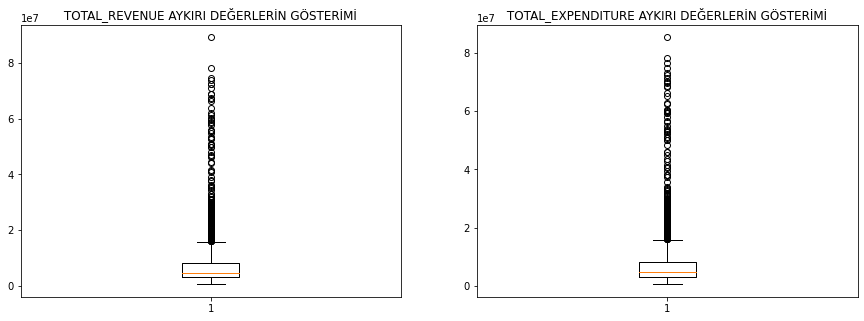

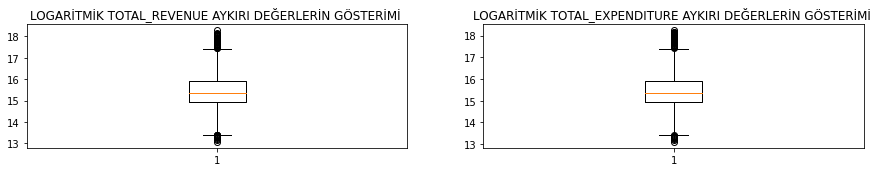

In [33]:
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }


plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.boxplot(df.TOTAL_REVENUE)
plt.title(" TOTAL_REVENUE AYKIRI DEĞERLERİN GÖSTERİMİ ")

plt.subplot(1,2,2)
plt.boxplot(df.TOTAL_EXPENDITURE)
plt.title(" TOTAL_EXPENDITURE AYKIRI DEĞERLERİN GÖSTERİMİ ")

plt.figure(figsize = (15,5))
plt.subplot(2,2,1)
plt.boxplot(np.log(df.TOTAL_REVENUE))
plt.title("LOGARİTMİK TOTAL_REVENUE AYKIRI DEĞERLERİN GÖSTERİMİ ")

plt.subplot(2,2,2)
plt.boxplot(np.log(df.TOTAL_EXPENDITURE))
plt.title("LOGARİTMİK TOTAL_EXPENDITURE AYKIRI DEĞERLERİN GÖSTERİMİ ")
plt.show()

In [34]:
# Logaritmik scalayı nasıl ayarlayacağız bulamadım ?


In [35]:
dfson = pd.DataFrame(columns = ["esik_deger","TOTAL_REVENUE_aykırı","TOTAL_REVENUE_aykırı_log","TOTAL_EXPENDITURE_aykırı","TOTAL_EXPENDITURE_aykırı_log"])

QTR1, QTR3 = np.percentile(df.TOTAL_REVENUE,[25,75])

stpr = QTR3 - QTR1

QTRL1, QTRL3 = np.percentile(np.log(df.TOTAL_REVENUE),[25,75])

stprl = QTRL3 - QTRL1

QTE1, QTE3  = np.percentile(df.TOTAL_EXPENDITURE,[25,75])

stpe = QTE3 - QTE1

QTEL1, QTEL3 = np.percentile(np.log(df.TOTAL_EXPENDITURE),[25,75])

stpel = QTEL3 - QTEL1

for i in np.arange(0,5,0.5):
    
    max_lmt_TOTAL_REVENUE = QTR3 + stpr*i
    min_lmt_TOTAL_REVENUE = QTR1 - stpr*i
    
    max_lmt_TOTAL_REVENUE_l = QTRL3 + stprl*i
    min_lmt_TOTAL_REVENUE_l = QTRL1 - stprl*i
    
    max_lmt_TOTAL_EXPENDITURE = QTE3 + stpe*i
    min_lmt_TOTAL_EXPENDITURE = QTE1 - stpe*i
    
    max_lmt_TOTAL_EXPENDITURE_l = QTEL3 + stpel*i
    min_lmt_TOTAL_EXPENDITURE_l = QTEL1 - stpel*i
    
    TOTAL_REVENUE_aykırı = len(np.where((df.TOTAL_REVENUE > max_lmt_TOTAL_REVENUE) | (df.TOTAL_REVENUE < min_lmt_TOTAL_REVENUE))[0])
    TOTAL_REVENUE_aykırı_log = len(np.where((np.log(df.TOTAL_REVENUE) > max_lmt_TOTAL_REVENUE_l) | (np.log(df.TOTAL_REVENUE)< min_lmt_TOTAL_REVENUE_l))[0])    
    
    TOTAL_EXPENDITURE_aykırı = len(np.where((df.TOTAL_EXPENDITURE > max_lmt_TOTAL_EXPENDITURE) | (df.TOTAL_EXPENDITURE < min_lmt_TOTAL_EXPENDITURE))[0])
    TOTAL_EXPENDITURE_aykırı_log = len(np.where((np.log(df.TOTAL_EXPENDITURE) > max_lmt_TOTAL_EXPENDITURE_l) | (np.log(df.TOTAL_EXPENDITURE)< min_lmt_TOTAL_EXPENDITURE_l))[0])    
    
    dfson =dfson.append({ "esik_deger" : i, "TOTAL_REVENUE_aykırı" : TOTAL_REVENUE_aykırı, "TOTAL_REVENUE_aykırı_log" : TOTAL_REVENUE_aykırı_log, "TOTAL_EXPENDITURE_aykırı" : TOTAL_EXPENDITURE_aykırı, "TOTAL_EXPENDITURE_aykırı_log" : TOTAL_EXPENDITURE_aykırı_log }, ignore_index=True)
    
    
    
dfson    
    

,esik_deger,TOTAL_REVENUE_aykırı,TOTAL_REVENUE_aykırı_log,TOTAL_EXPENDITURE_aykırı,TOTAL_EXPENDITURE_aykırı_log
0,0.0,858.0,858.0,858.0,858.0
1,0.5,321.0,502.0,315.0,499.0
2,1.0,246.0,218.0,246.0,221.0
3,1.5,195.0,58.0,195.0,62.0
4,2.0,161.0,15.0,160.0,16.0
5,2.5,132.0,0.0,134.0,0.0
6,3.0,111.0,0.0,109.0,0.0
7,3.5,90.0,0.0,95.0,0.0
8,4.0,70.0,0.0,67.0,0.0
9,4.5,54.0,0.0,56.0,0.0


Bir kez daha gördük ki değerlerin logaritmik karşılığı alınınca aykırı değerler ciddi anlamda azalıyor. Fakat akla gelen soru:

Düşünelim ki elimizdeki reel veri ciddi anlamda aykırı değer taşıdığı için her bir değerin logaritması alınırak data üzerinde manipilasyon yapıyoruz.  Manipule olmuş bu değerler ile bir makine öğrenmesi gerçekleştiriyoruz. Test datalarda manipule verilerden elde edildiği için kusursuz bir sonuç elde ediyoruz. Real dünyaya geri döndüğümüzde gelecek olan veriler logaritmik olmayacak. Peki girdi olarak kabul ettiğimiz bu gerçek veriler logaritmik bir regrasyondan oluşturulmuş bir öğretide bize doğru sonuç verebilecek mi ? Gerçek girdilerin de logaritmik alsak çıkan sonucu ters logaritmasını mı almak gerekecek ? x=Gerçek , y =Gerçek , x= log ise y = ?

## BÜTÇE AÇIĞI

Datalar karışmasın diye yeni bir datafream oluşturalım.

In [36]:
df_but = pd.read_csv("/Users/aytackolukisa/Desktop/Jupiter_Dosyaları/states_all_extended.csv")

In [37]:
df_but = df_but.drop(["PRIMARY_KEY","STATE"],axis=1)

In [38]:
def ortalama (variable):
    a=df_but.groupby('YEAR')[variable].mean()
    liste=np.arange(len(a))
    for i in liste :
        df_but[variable].fillna(a.values[i], inplace = True)

In [42]:
liste_ =df_but.columns
for x in liste_:
    ortalama(x)
    
df_but.isnull().sum()*100/len(df1)

YEAR                    0.0
ENROLL                  0.0
TOTAL_REVENUE           0.0
FEDERAL_REVENUE         0.0
STATE_REVENUE           0.0
                       ... 
G08_AM_A_MATHEMATICS    0.0
G08_HP_A_READING        0.0
G08_HP_A_MATHEMATICS    0.0
G08_TR_A_READING        0.0
G08_TR_A_MATHEMATICS    0.0
Length: 264, dtype: float64

In [43]:
df_but["Butce_acıgı"] = df_but.TOTAL_EXPENDITURE - df_but.TOTAL_REVENUE

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,G08_HI_A_MATHEMATICS,G08_AS_A_READING,G08_AS_A_MATHEMATICS,G08_AM_A_READING,G08_AM_A_MATHEMATICS,G08_HP_A_READING,G08_HP_A_MATHEMATICS,G08_TR_A_READING,G08_TR_A_MATHEMATICS,Butce_acıgı
0,1992,802054.333333,2.678885e+06,3.041770e+05,1.659028e+06,7.156800e+05,2.653798e+06,1.481703e+06,7.350360e+05,248234.784314,...,269.897959,276.354839,304.032258,248.307692,260.461538,249.0,266.0,268.5,286.3,-25087.000000
1,1992,802054.333333,1.049591e+06,1.067800e+05,7.207110e+05,2.221000e+05,9.724880e+05,4.983620e+05,3.509020e+05,248234.784314,...,269.897959,276.354839,304.032258,248.307692,260.461538,249.0,266.0,268.5,286.3,-77103.000000
2,1992,802054.333333,3.258079e+06,2.978880e+05,1.369815e+06,1.590376e+06,3.401580e+06,1.435908e+06,1.007732e+06,248234.784314,...,269.897959,276.354839,304.032258,248.307692,260.461538,249.0,266.0,268.5,286.3,143501.000000
3,1992,802054.333333,1.711959e+06,1.785710e+05,9.587850e+05,5.746030e+05,1.743022e+06,9.643230e+05,4.834880e+05,248234.784314,...,269.897959,276.354839,304.032258,248.307692,260.461538,249.0,266.0,268.5,286.3,31063.000000
4,1992,802054.333333,2.626002e+07,2.072470e+06,1.654651e+07,7.641041e+06,2.713883e+07,1.435892e+07,8.520926e+06,248234.784314,...,269.897959,276.354839,304.032258,248.307692,260.461538,249.0,266.0,268.5,286.3,878807.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710,2019,802054.333333,4.572764e+06,2.970296e+05,2.088314e+06,2.187420e+06,4.653591e+06,2.454000e+06,1.370149e+06,248234.784314,...,278.000000,286.000000,315.000000,248.307692,260.461538,249.0,266.0,269.0,293.0,80826.647059
1711,2019,802054.333333,4.572764e+06,2.970296e+05,2.088314e+06,2.187420e+06,4.653591e+06,2.454000e+06,1.370149e+06,248234.784314,...,267.000000,285.000000,315.000000,237.000000,259.000000,249.0,266.0,263.0,292.0,80826.647059
1712,2019,802054.333333,4.572764e+06,2.970296e+05,2.088314e+06,2.187420e+06,4.653591e+06,2.454000e+06,1.370149e+06,248234.784314,...,269.897959,276.354839,304.032258,248.307692,260.461538,249.0,266.0,249.0,286.3,80826.647059
1713,2019,802054.333333,4.572764e+06,2.970296e+05,2.088314e+06,2.187420e+06,4.653591e+06,2.454000e+06,1.370149e+06,248234.784314,...,273.000000,277.000000,294.000000,253.000000,267.000000,249.0,266.0,268.0,276.0,80826.647059


### TUKEY YÖNTEMİ İLE AYKIRI DEĞERLERİN BULUNMASI

In [47]:
Q1, Q3 = np.percentile(df_but.Butce_acıgı,[25,75])
step = Q3 - Q1
aykırıdeger_butce = pd.DataFrame(columns = ["esik_degeri", "Butce_aykiri_deger"])
for i in np.arange(0,5,0.5):
    max_sınır = Q3 + step*i
    min_sınır = Q1 - step*i
    aykırı_deger = len(np.where((df_but > max_sınır) | (df_but < min_sınır))[0])
    aykırıdeger_butce = aykırıdeger_butce.append({"esik_degeri" : i, "Butce_aykiri_deger" : aykırı_deger}, ignore_index = True )

aykırıdeger_butce

,esik_degeri,Butce_aykiri_deger
0,0.0,25991.0
1,0.5,22296.0
2,1.0,20678.0
3,1.5,18759.0
4,2.0,17316.0
5,2.5,16691.0
6,3.0,15643.0
7,3.5,14739.0
8,4.0,13538.0
9,4.5,13169.0


Butçe değişkenini dağılım olarak histogramda aykırı değer olarakda boxplotta ve eşik_/aykırı değer plot grafiklerinde gösterelim.


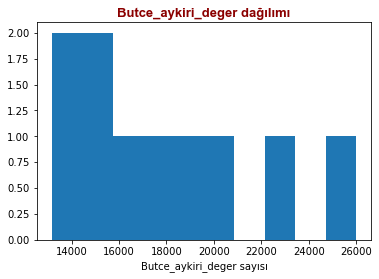

In [52]:
plt.hist(aykırıdeger_butce.Butce_aykiri_deger)
plt.title("Butce_aykiri_deger dağılımı", fontdict=baslik_font)
plt.xlabel("Butce_aykiri_deger sayısı")
plt.show()

In [ ]:
# Dağılımın kesinlikle normal bir dağılım olmadığı gözükmektedir.

Text(0.5, 1.0, 'Esik_degeri / Aykırı_deger_sayısı')

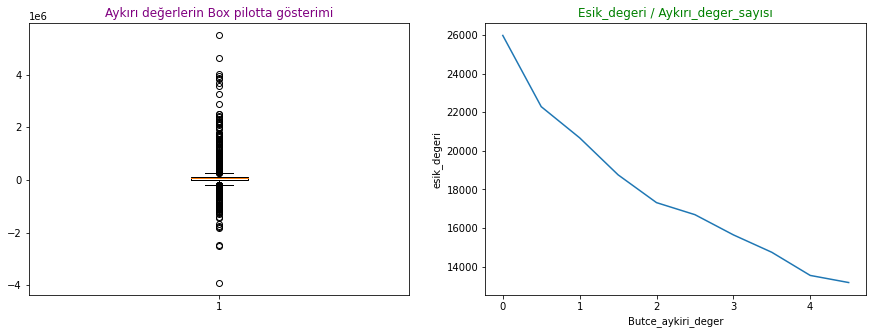

In [59]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.boxplot(df_but.Butce_acıgı)
plt.title("Aykırı değerlerin Box pilotta gösterimi", color="Purple")

plt.subplot(1,2,2)
plt.plot(aykırıdeger_butce.esik_degeri,aykırıdeger_butce.Butce_aykiri_deger)
plt.xlabel("Butce_aykiri_deger")
plt.ylabel("esik_degeri")
plt.title("Esik_degeri / Aykırı_deger_sayısı", color ="Green")

Logartimik yöntem ile değerlerde manipilasyon yapalım ve teker teker dağılmları inceleyelim

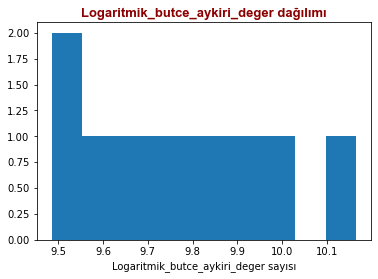

In [60]:
plt.hist(np.log(aykırıdeger_butce.Butce_aykiri_deger))
plt.title("Logaritmik_butce_aykiri_deger dağılımı", fontdict=baslik_font)
plt.xlabel("Logaritmik_butce_aykiri_deger sayısı")
plt.show()

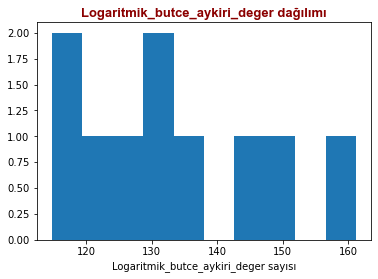

In [62]:
# Dağılım yine normal olmadı kare kök deneyelim
plt.hist(np.sqrt(aykırıdeger_butce.Butce_aykiri_deger))
plt.title("Karekök_butce_aykiri_deger dağılımı", fontdict=baslik_font)
plt.xlabel("Karekök_butce_aykiri_deger sayısı")
plt.show()

Her iki yöntemde başarılı bir normal dağılım ne yazık ki sağlamadı. Peki başka yöntemler mevcut mu? 

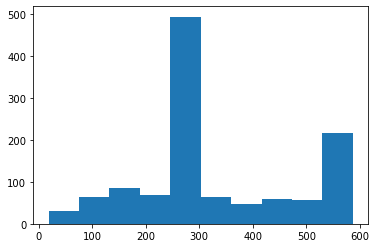

In [74]:
from scipy.stats.mstats import winsorize

winsorize_goruntulenme = winsorize(df_but["Butce_acıgı"], (0.12, 0.10))

plt.hist(np.sqrt(winsorize_goruntulenme))
plt.show()

(array([  7.,   4.,   7.,  12.,  39.,  40.,  93., 529., 120., 333.]),
 array([ 5.85507192,  6.54455141,  7.23403089,  7.92351038,  8.61298987,
         9.30246935,  9.99194884, 10.68142833, 11.37090781, 12.0603873 ,
        12.74986679]),
 <BarContainer object of 10 artists>)

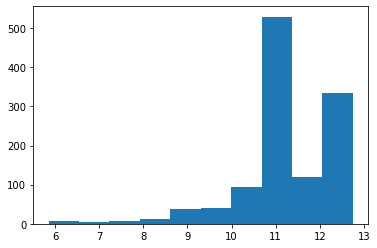

In [76]:
# Hadi birde bunun logaritmasını alallım

plt.hist(np.log(winsorize_goruntulenme))

In [77]:
# Tüm dağılımlar incelendiğinde normal dağılımı en yakın görsel winsorizetion ile sınırlandırma yapamaktır.

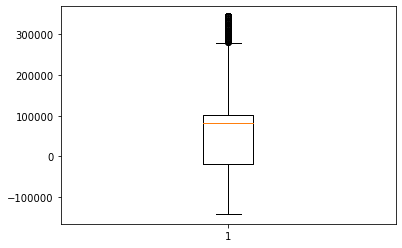

In [80]:
plt.boxplot(winsorize_goruntulenme)
plt.show()

### BUTÇE AÇIĞI İKİ

In [81]:
data.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,G08_HI_A_READING,G08_HI_A_MATHEMATICS,G08_AS_A_READING,G08_AS_A_MATHEMATICS,G08_AM_A_READING,G08_AM_A_MATHEMATICS,G08_HP_A_READING,G08_HP_A_MATHEMATICS,G08_TR_A_READING,G08_TR_A_MATHEMATICS
0,1992_ALABAMA,ALABAMA,1992,802054.333333,2678885.0,304177.0,1659028.0,715680.0,2678885.0,1481703.0,...,253.708333,269.897959,276.354839,304.032258,248.307692,260.461538,249.0,266.0,268.5,286.3
1,1992_ALASKA,ALASKA,1992,802054.333333,1049591.0,106780.0,720711.0,222100.0,1049591.0,498362.0,...,253.708333,269.897959,276.354839,304.032258,248.307692,260.461538,249.0,266.0,268.5,286.3
2,1992_ARIZONA,ARIZONA,1992,802054.333333,3258079.0,297888.0,1369815.0,1590376.0,3258079.0,1435908.0,...,253.708333,269.897959,276.354839,304.032258,248.307692,260.461538,249.0,266.0,268.5,286.3
3,1992_ARKANSAS,ARKANSAS,1992,802054.333333,1711959.0,178571.0,958785.0,574603.0,1711959.0,964323.0,...,253.708333,269.897959,276.354839,304.032258,248.307692,260.461538,249.0,266.0,268.5,286.3
4,1992_CALIFORNIA,CALIFORNIA,1992,802054.333333,15671363.0,2072470.0,16546514.0,7641041.0,15671363.0,14358922.0,...,253.708333,269.897959,276.354839,304.032258,248.307692,260.461538,249.0,266.0,268.5,286.3


In [82]:
winsorize_TOTAL_REVENUE = winsorize(data.TOTAL_REVENUE, (0,0.115))
winsorize_TOTAL_EXPENDITURE = winsorize(data.TOTAL_REVENUE, (0,0.115))

In [85]:
data.TOTAL_REVENUE = winsorize_TOTAL_REVENUE
data.TOTAL_EXPENDITURE = winsorize_TOTAL_EXPENDITURE

In [86]:
data["Duzeltilmis_Butçe"] = data.TOTAL_REVENUE - data.TOTAL_EXPENDITURE

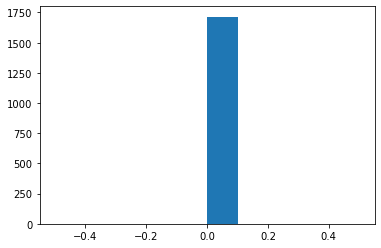

In [88]:
plt.hist(data.Duzeltilmis_Butçe)
plt.show()

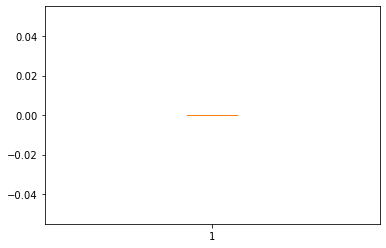

In [90]:
plt.boxplot(data.Duzeltilmis_Butçe)
plt.show()

Sonuç olarak; Eğer biz değişkenleri Bütçe farkı değişkenini oluşturmadan düzeltirsek. verilergerçekçi dağılımından kayboluyor ve tek bir eksende sıkışıyor. Bu istenilen bir durum değil. Bence en doğru yöntem "Bütçe Farkı" değişkeni oluşturduktan sonra veriler üzerinde manipilasyon işlemlerini gerçekleştirmek.